# Experimentation: Data Pre-Processing
---

In [164]:
# Import libraries
from monai.data import DataLoader
from monai.transforms import (EnsureChannelFirstd,
Compose, LoadImaged, ResampleToMatchd, MapTransform, SaveImaged)

from monai.apps import TciaDataset
from monai.apps.auto3dseg import AutoRunner
from monai.bundle import ConfigParser

from monai.config import print_config
import json

print_config()


MONAI version: 1.3.0
Numpy version: 1.26.4
Pytorch version: 2.2.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 865972f7a791bf7b42efbcd87c8402bd865b329e
MONAI __file__: c:\Users\<username>\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.3.0
Nibabel version: 5.2.1
scikit-image version: 0.22.0
scipy version: 1.12.0
Pillow version: 10.2.0
Tensorboard version: 2.16.2
gdown version: 4.7.3
TorchVision version: 0.17.1
tqdm version: 4.66.2
lmdb version: 1.4.1
psutil version: 5.9.8
pandas version: 2.2.1
einops version: 0.7.0
transformers version: 4.38.2
mlflow version: 2.11.1
pynrrd version: 1.0.0
clearml version: 1.14.5rc0

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [165]:
# Specify the collection and segmentation type
collection, seg_type = "HCC-TACE-Seg", "SEG"

# Create a dictionary to map the labels in the segmentation to the labels in the image
label_dict = {'Liver': 0,
  'Tumor': 1,
  'vessels': 2,
  'aorta': 3}

class UndoOneHotEncoding(MapTransform):
    def __init__(self, keys):
        super().__init__(keys)

    def __call__(self, data):
        for key in self.keys:
            data[key] = data[key].argmax(dim=0).unsqueeze(0)
        return data
    
# Create a composed transform that loads the image and segmentation, resamples the image to match the segmentation,
# and undoes the one-hot encoding of the segmentation
transform = Compose(
    [
        LoadImaged(reader="PydicomReader", keys=["image", "seg"], label_dict=label_dict),
        EnsureChannelFirstd(keys=["image", "seg"]),
        #ResampleToMatchd(keys="image", key_dst="seg"),
        UndoOneHotEncoding(keys="seg"),
        SaveImaged(keys="seg", output_dir="../data/HCC-TACE-Seg/segmentations", output_postfix="seg", output_ext=".dcm", output_dtype="torch.float32"),
    ]
)

# Create a dataset for the training with a validation split
train_dataset = TciaDataset(
    root_dir="../data",
    collection=collection,
    section="training",
    transform=transform,
    download=True,
    download_len=2,
    seg_type=seg_type,
    progress=True,
    cache_rate=0.0,
    val_frac=0.0,
)

1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip: 104kB [00:00, 120kB/s]  


2024-03-18 08:58:45,320 - INFO - Downloaded: ..\data\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip
2024-03-18 08:58:45,321 - INFO - Expected md5 is None, skip md5 check for file ..\data\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip.
2024-03-18 08:58:45,322 - INFO - Writing into directory: ..\data\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.


1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip: 15.8MB [00:05, 3.24MB/s]


2024-03-18 08:58:50,897 - INFO - Downloaded: ..\data\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip
2024-03-18 08:58:50,897 - INFO - Expected md5 is None, skip md5 check for file ..\data\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip.
2024-03-18 08:58:50,898 - INFO - Writing into directory: ..\data\HCC-TACE-Seg\HCC_017\300\image.


1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.zip: 72.0kB [00:01, 66.9kB/s]


2024-03-18 08:58:52,229 - INFO - Downloaded: ..\data\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.zip
2024-03-18 08:58:52,229 - INFO - Expected md5 is None, skip md5 check for file ..\data\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.zip.
2024-03-18 08:58:52,229 - INFO - Writing into directory: ..\data\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.


Exception in thread QueueFeederThreadException ignored in: :
<function _ConnectionBase.__del__ at 0x000001E2FF58C400>Traceback (most recent call last):

  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\multiprocessing\queues.py", line 239, in _feed
Traceback (most recent call last):
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\multiprocessing\connection.py", line 133, in __del__
    reader_close()
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\multiprocessing\connection.py", line 178, in close
    self._close()
      File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\multiprocessing\connection.py", line 282, in _close
self._close()    
_CloseHandle(self._handle)
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\multiprocessing\connection.py", line 282, in _close
OSError:     [WinError 6] De ingang is ongeldig_CloseHandle(self._handle)

OSError: [WinError 6] De ingang is ongeldig

During handling of the above excepti

2024-03-18 08:59:21,747 - INFO - Downloaded: ..\data\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.231513034103627633230071228105.zip
2024-03-18 08:59:21,747 - INFO - Expected md5 is None, skip md5 check for file ..\data\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.231513034103627633230071228105.zip.
2024-03-18 08:59:21,747 - INFO - Writing into directory: ..\data\HCC-TACE-Seg\HCC_077\300\image.


OSError: [Errno 28] No space left on device

In [166]:
print(train_dataset.datalist)

[{'image': '..\\data\\HCC-TACE-Seg\\HCC_077\\300\\image', 'fold': 0, 'label': '..\\data\\HCC-TACE-Seg\\HCC_077\\300\\seg'}, {'image': '..\\data\\HCC-TACE-Seg\\HCC_017\\300\\image', 'fold': 0, 'label': '..\\data\\HCC-TACE-Seg\\HCC_017\\300\\seg'}]


In [167]:
# Create a dataloader
train_loader = DataLoader(train_dataset, batch_size=1, num_workers=0)

In [168]:
# Sample a batch of data from the dataloader
batch = next(iter(train_loader))


RuntimeError: applying transform <monai.transforms.compose.Compose object at 0x000001E2BF896F10>

In [ ]:
batch2 = next(iter(train_loader))

In [158]:
# Print the batch data keys
print(batch.keys())

# Print the batch data shapes
print(batch["image"].shape, batch["seg"].shape)

# Print the batch data types
print(batch["image"].dtype, batch["seg"].dtype)

dict_keys(['image', 'seg'])
torch.Size([1, 1, 512, 512, 87]) torch.Size([1, 1, 512, 512, 87])
torch.float32 torch.int64


In [159]:
# Separate the image and segmentation from the batch
image, seg = batch["image"], batch["seg"]

# Undo the one-hot encoding of the segmentation
# seg = seg.argmax(dim=1)
# seg = seg.unsqueeze(1)


print(image.shape, seg.shape, seg.unique())


torch.Size([1, 1, 512, 512, 87]) torch.Size([1, 1, 512, 512, 87]) metatensor([0, 1, 2, 3])


torch.Size([512, 512]) torch.Size([512, 512])


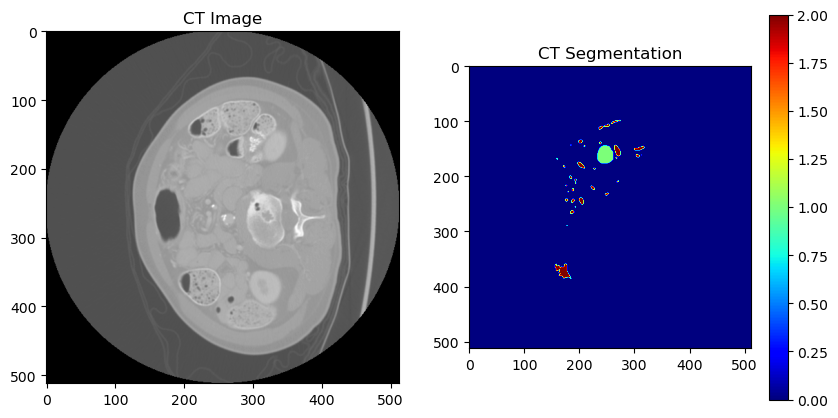

In [160]:
import torch
import matplotlib.pyplot as plt

slice_idx = 60

# Sample a slice from the image
CT_slice = image[0, 0, :, :, slice_idx]

# Get the maximum segmentation class for each pixel in the slice
CT_seg_slice = seg[0, 0, :, :, slice_idx]

print(CT_slice.shape, CT_seg_slice.shape)

# Plot the image and segmentation slice as a subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(CT_slice, cmap="gray")
axes[0].set_title("CT Image")
axes[1].imshow(CT_seg_slice, cmap="jet")
axes[1].set_title("CT Segmentation")
plt.colorbar(mappable=axes[1].imshow(CT_seg_slice, cmap='jet'), ax=axes[1])
plt.show()

## Setup AutoRunner for automatic segmentation model training and hyperparameter finetuning
---

In [161]:
# Add a fold key to all the training data
train_dataset.datalist = [{**item, 'fold': 0} for item in train_dataset.datalist]

# Change "seg" to "label" in the datalist
for item in train_dataset.datalist:
    item["label"] = item.pop("seg")

# Concatenate the training and test datalists
data_list = {"training": train_dataset.datalist}

datalist_file = "../auto3dseg_datalist.json"
with open(datalist_file, "w") as f:
    json.dump(data_list, f)

In [162]:
# Create input configuration .yaml file
input_config = {
    "name": "HCC-TACE-Seg",
    "task": "segmentation",  
    "modality": "CT", 
    "datalist": "../auto3dseg_datalist.json", 
    "dataroot": "../data", 
}

config_yaml = "./auto3dseg_config.yaml"
ConfigParser.export_config_file(input_config, config_yaml)

In [163]:
runner = AutoRunner(work_dir = "../data/auto3dseg", input=input_config)
runner.run()

2024-03-18 08:56:45,155 - INFO - AutoRunner using work directory ../data/auto3dseg
2024-03-18 08:56:45,167 - INFO - Datalist was copied to work_dir: c:\Users\20191678\OneDrive - TU Eindhoven\5ARIP10 - Interdisiplinary Team Project T3 G3\5ARIP10-ITP-T3G3\data\auto3dseg\auto3dseg_datalist.json
2024-03-18 08:56:45,170 - INFO - Setting num_fold 1 based on the input datalist c:\Users\20191678\OneDrive - TU Eindhoven\5ARIP10 - Interdisiplinary Team Project T3 G3\5ARIP10-ITP-T3G3\data\auto3dseg\auto3dseg_datalist.json.
2024-03-18 08:56:45,174 - INFO - Using user defined command running prefix , will override other settings
2024-03-18 08:56:45,175 - INFO - Running data analysis...
2024-03-18 08:56:45,176 - INFO - Found 0 GPUs for data analyzing!
2024-03-18 08:56:45,179 - INFO - device=cuda:0 but CUDA device is not available, using CPU instead.


  0%|          | 0/2 [00:24<?, ?it/s]


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 141, in apply_transform
    return _apply_transform(transform, data, unpack_items, lazy, overrides, log_stats)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 98, in _apply_transform
    return transform(data, lazy=lazy) if isinstance(transform, LazyTrait) else transform(data)
                                                                               ^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\apps\auto3dseg\transforms.py", line 82, in __call__
    raise ValueError(
ValueError: The label shape torch.Size([512, 512, 348]) is different from the source shape torch.Size([512, 512, 87]) ..\data\..\data\HCC-TACE-Seg\HCC_077\300\seg.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 141, in apply_transform
    return _apply_transform(transform, data, unpack_items, lazy, overrides, log_stats)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 98, in _apply_transform
    return transform(data, lazy=lazy) if isinstance(transform, LazyTrait) else transform(data)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\compose.py", line 335, in __call__
    result = execute_compose(
             ^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\compose.py", line 111, in execute_compose
    data = apply_transform(
           ^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 171, in apply_transform
    raise RuntimeError(f"applying transform {transform}") from e
RuntimeError: applying transform <monai.apps.auto3dseg.transforms.EnsureSameShaped object at 0x000001F9C2D7F9D0>

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\data\dataset.py", line 112, in __getitem__
    return self._transform(index)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\data\dataset.py", line 98, in _transform
    return apply_transform(self.transform, data_i) if self.transform is not None else data_i
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 171, in apply_transform
    raise RuntimeError(f"applying transform {transform}") from e
RuntimeError: applying transform <monai.transforms.compose.Compose object at 0x000001F9F8007810>
